In [121]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [122]:
def mean(data):
    sum = 0
    for val in data:
        sum += val
    average = sum/len(data)
    return average

def variance(data):
    sum = 0
    for num in data:
        sum += (num - mean(data))**2
    vari = sum/len(data)
    return vari

def stand_dev(data):
    de = math.sqrt(variance(data))
    return de

In [123]:
drive_path = "/kaggle/input/cluster/driving_clustering_data.txt"
drive = pd.read_csv(drive_path, delim_whitespace=True)
drive.columns = ['id', 'dist', 'speed']
drive

,id,dist,speed
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0
...,...,...,...
3995,3423310685,160.04,10.0
3996,3423312600,176.17,5.0
3997,3423312921,170.91,12.0
3998,3423313630,176.14,5.0


<AxesSubplot:xlabel='dist', ylabel='speed'>

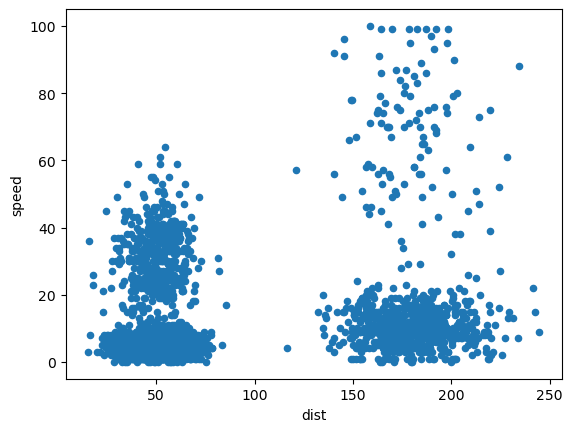

In [124]:
drive.plot(x='dist', y='speed', kind='scatter')

Write a function that will take as input a set of data (you can choose it to be either a list or array) and returns a set of normalized data values for the input data.

<AxesSubplot:xlabel='norm dist', ylabel='norm speed'>

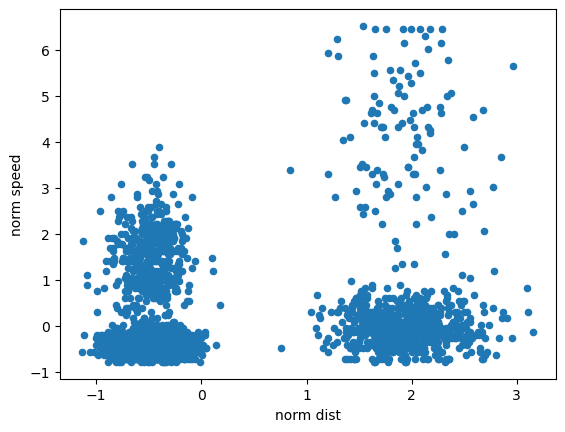

In [125]:
drive['norm dist'] = (drive.dist - drive.dist.mean())/drive.dist.std()
drive['norm speed'] = (drive.speed - drive.speed.mean())/drive.speed.std()
drive.plot(x='norm dist', y='norm speed', kind='scatter')

Write a function that will accept input from the user for the coordinates of the initial guesses of the coordinates of the cluster centroids. The function should be flexible enough to allow for any number of clusters. The function should return the user input centroids for each cluster.

In [126]:
def cluster_guess():
    amount = int(input("How many: "))
    xes = []
    yes = []
    for n in range(0,amount):
        xes.append(float(input("X cord: ")))
        yes.append(float(input("Y cord: ")))
    return xes, yes

In [127]:
clustx, clusty = cluster_guess()
print(clustx, clusty)
#4, -.5 -.5 -.5 1.5 2 0 2 4

How many:  4
X cord:  -.5
Y cord:  -.5
X cord:  -.5
Y cord:  1.5
X cord:  2
Y cord:  0
X cord:  2
Y cord:  4


[-0.5, -0.5, 2.0, 2.0] [-0.5, 1.5, 0.0, 4.0]


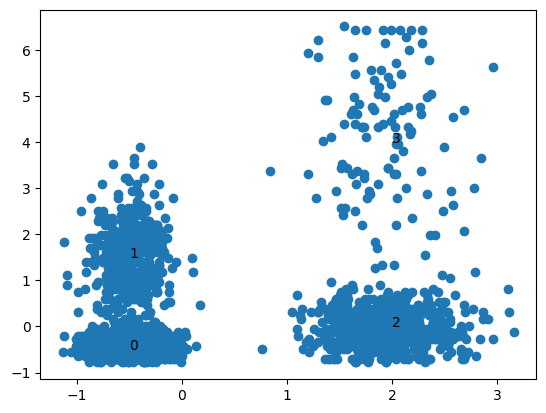

In [128]:
plt.scatter(drive['norm dist'], drive['norm speed'])
for n in range(0, len(clustx)):
    plt.text(clustx[n], clusty[n], f"{n}")

Write a python function to perform the K-means clustering algorithm on a set of 2 dimensional data. The function should output a plot of the clusters for each iteration until the termination criteria for the algorithm is reached. Use different colors for each cluster. Besides showing which data points belong to each cluster, your plots should also show the location of the centroid for each cluster on every iteration.

In [135]:
def classify(xs, ys, centroidx, centroidy):
    group_coords = {}
    classe = [] #distance tracker 
    for num in range(0, len(centroidx)):
        group_coords[num] = [[],[]] # establishes dictionary
        
    for n in range(0, len(xs)): # for each coord
        
        for c in range(0, len(centroidx)): # for each centroid
            classe.append((xs[n] - centroidx[c])**2 + (ys[n] - centroidy[c])**2) # put the distance for each point to centroid in classe
            
        i = classe.index(min(classe)) #i is the index of the least distance
        group_coords[i][0].append(xs[n])
        group_coords[i][1].append(ys[n])
        classe.clear()
    
    return group_coords

def centroid_new(xes, yes):
    x_av =  mean(xes)
    y_av =  mean(yes)
    return x_av, y_av

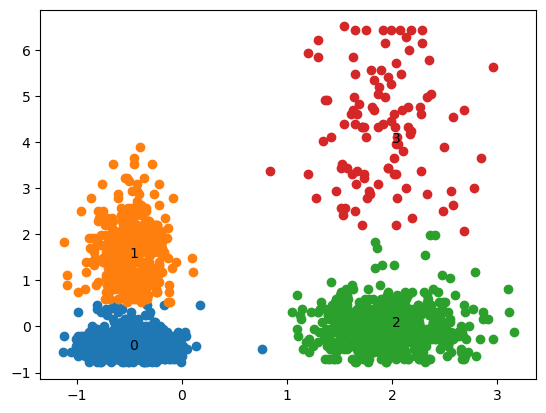

In [140]:
dr_co = classify(drive['norm dist'], drive['norm speed'], clustx, clusty)
for g in range(0, len(dr_co)):
               plt.scatter(dr_co[g][0], dr_co[g][1])
for n in range(0, len(clustx)):
    plt.text(clustx[n], clusty[n], f"{n}")

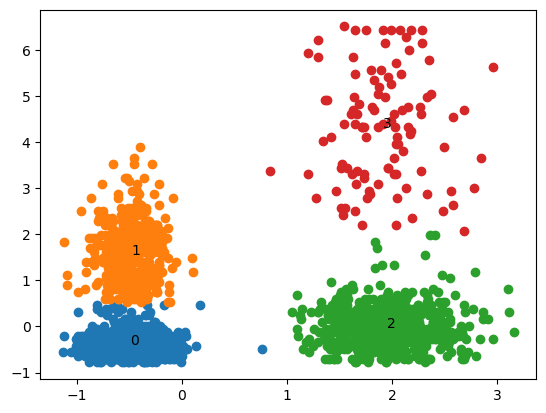

In [141]:
for g in range(0, len(dr_co)):
               plt.scatter(dr_co[g][0], dr_co[g][1])
        
new_centx = []
new_centy = []
for n in range(0, len(dr_co)):
    cx, cy = centroid_new(dr_co[n][0], dr_co[n][1])
    new_centx.append(cx)
    new_centy.append(cy)
    plt.text(cx, cy, f"{n}")

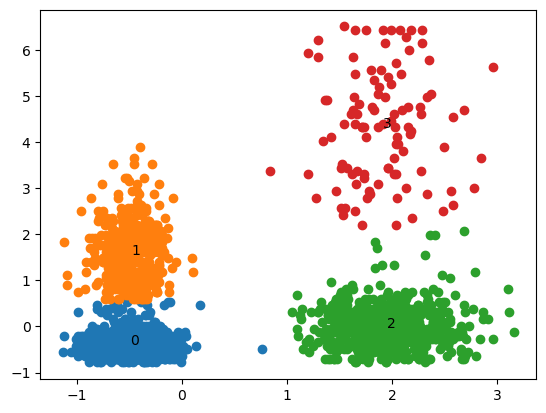

In [142]:
run2 = classify(drive['norm dist'], drive['norm speed'], new_centx, new_centy)
for g in range(0, len(run2)):
               plt.scatter(run2[g][0], run2[g][1])
        
for n in range(0, len(new_centx)):
     plt.text(new_centx[n], new_centy[n], f"{n}")